In [84]:
from sklearn import datasets
iris = datasets.load_iris()

In [85]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


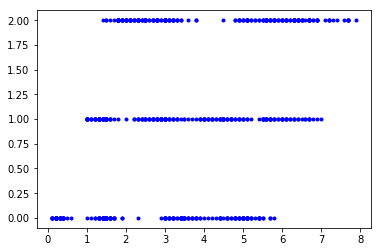

In [86]:
import matplotlib.pyplot as plt
plt.plot(iris.data, iris.target, 'b.')

In [87]:
import pandas as pd
import numpy as np 
df = pd.DataFrame(iris.data)
#df2 = df[10:120]
df2 = np.array(df)

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df2)
clusters = kmeans.predict(df2)

In [89]:
centres = kmeans.cluster_centers_

In [91]:
f_dist = []
import math
for point, value in zip(df2, clusters):
    distance = math.sqrt(sum((centres[value]-point)**2))
    f_dist.append(distance)

In [92]:
f_dist2 = sorted(f_dist, reverse = True)

In [93]:
outliers = []
index = range(5)
for item in index:
    outliers.append(f_dist.index(f_dist2[item]))
print ("Outliers are the datapoints:", outliers)

Outliers are the datapoints: [98, 57, 93, 60, 118]


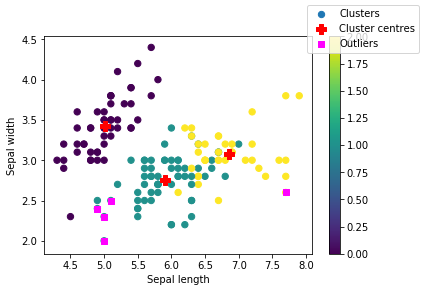

In [96]:
%matplotlib inline
sublist = []
centres2 = []
for i in range(3):
    sublist = centres[i][0:2]
    centres2.append(sublist)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df[0],df[1],c=clusters,s=40, label='Clusters')
for i,j in centres2:
    ctrs = ax.scatter(i,j,s=100,c='red',marker='P')
ctrs.set_label("Cluster centres")
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
plt.colorbar(scatter)
for points in outliers:
    py = plt.scatter(df[0][points], df[1][points], color = "magenta",s=40, marker='s')
py.set_label("Outliers")
fig.legend(loc="best")
fig.show()